<div style="text-align: center;">
  <h1>
    Eszleen binti Sies (P149790)
  </h1>
  <h2>
    Project 2<br>
    STQD6014 - Data Science<br>
    Semester 2 2024/2025
  </h2>
</div>

<a name="intro"></a>
# Introduction

> This is a copy dataset from [https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london?select=daily_dataset). The downloaded version can be taken from my [https://unitenedumy-my.sharepoint.com/:x:/g/personal/eszleen_uniten_edu_my/EaVij0-2hWZEnT8A6ajVuD4BhSo89nAj4RtNJd04tjN5Yw?e=UUjcVL) for reproducibility.

The purpose of this project is to analyse a dataset containing daily electricity consumption data collected from London households. The dataset also includes basic temporal information such as dates, which enables the identification of daily usage trends, as well as aggregated weekly and monthly patterns. Multiple Python libraries, including Pandas, Matplotlib, and Seaborn, are used for data cleaning and visualisation to uncover key trends and insights.

---

Contents:
*   [Introduction](#intro)
*   [Problem Statement](#problem-statement)
*   [Data Cleaning](#data-cleaning)
*   [Visualization](#visualization)
*   [Insights and Explanations](#InE)
*   [Result and Discussion](#RnD)
*   [Conclusion](#conclusion)
*   [References](#references)
*   [Future Endeavours](#FnE)

## Data Description

The dataset used in this project originates from the Low Carbon London (LCL) Smart Meter project, which recorded electricity consumption from multiple households in London between 2011 and 2014. For this project, the daily aggregated dataset is utilised, covering the period from November 2011 to February 2014 and consisting of 50 households.

The dataset contains multiple columns which are;

> 1.  `LCLid`: Unique identifier for each household (only available in the individual dataset version; combined dataset may not include this column).
> 2.  `day `: Date of the energy reading.
> 3.  `energy_sum`: Total daily energy consumption in kilowatt-hours (kWh).
> 4.  `energy_mean`: Average energy consumption per reading in a day.
> 5.  `energy_max / energy_min`: Maximum and minimum daily consumption values.
> 6.  `energy_median / energy_std`: Median and standard deviation of daily consumption.
> 7.  `energy_count`: Number of readings per day (e.g., 48 for half-hourly aggregated).
> 8.  `Derived columns`: Month, weekday, and year extracted from the date for time-series analysis.
> This structure allows daily trends to be analysed and further aggregated into weekly, monthly, and yearly patterns.

<a name="problem-statement"></a>
# Problem Statement

We are interested in the patterns and variations of daily electricity consumption across multiple households in London. This analysis aims to understand the distribution of the dataset and uncover meaningful insights into how energy usage changes over time (daily, weekly, monthly) and between households. The analysis can be broken down into:


> 1.   [Descriptive Analytics](#descr-analytics)
    -   What is the daily distribution of electricity consumption?
    -   What are the monthly and seasonal usage trends?
    -   How does energy consumption vary by day of the week (weekday vs weekend)?
    -   Which households demonstrate the highest and lowest total energy usage?
> 2.   [Comparison Analytics](#comp-analytics)
    -   How do yearly consumption patterns compare over the available period (2012–2014)?
    -   Are there distinct usage patterns between high-consumption and low-consumption households?
    -   What temporal factors (day, month, year) are most significant in influencing energy usage?


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set global setting for matplotlib
%matplotlib inline
sns.set_palette('pastel')

# Ignore warnings for cleaner coding
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Keep the dataset as a pandas dataframe into data variable, and visualize top 10 rows
data = pd.read_csv("C:\\Users\\User\\Desktop\\PROJEK2STQD6014\\block_11.csv")
data.head(10)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000155,23/11/2011,0.3020,0.421864,0.961,22,0.240825,9.281,0.110
1,MAC000155,24/11/2011,0.2220,0.301687,1.005,48,0.234816,14.481,0.083
2,MAC000155,25/11/2011,0.2325,0.285187,0.899,48,0.192539,13.689,0.080
3,MAC000155,26/11/2011,0.2430,0.335000,1.025,48,0.242270,16.080,0.093
4,MAC000155,27/11/2011,0.3095,0.334583,0.965,48,0.183428,16.060,0.148
5,MAC000155,28/11/2011,0.2205,0.331687,1.284,48,0.271584,15.921,0.083
6,MAC000155,29/11/2011,0.2040,0.262729,0.962,48,0.215108,12.611,0.057
7,MAC000155,30/11/2011,0.2060,0.283396,1.250,48,0.245196,13.603,0.095
8,MAC000155,1/12/2011,0.2165,0.245708,0.561,48,0.119995,11.794,0.113
9,MAC000155,2/12/2011,0.2080,0.331437,1.098,48,0.261122,15.909,0.086


From the dataset above, it can be observed that there are 9 key features related to daily electricity consumption. The LCLid column is categorical, representing household identifiers, while the day column is temporal, providing date information. The remaining columns, such as energy_sum, energy_mean, and energy_max, are numerical features describing various statistics of daily energy usage. Although the energy_std column contains missing values, it is not utilised in this analysis and therefore does not require any treatment. The initial step in the analysis focuses on inspecting the remaining features, handling duplicates, and preparing the data (e.g., converting dates and deriving month and weekday attributes) prior to visualisation and pattern analysis.

<a name="data-cleaning"></a>
# Data Cleaning


## Removing duplicates

In [76]:
# Show the summary of categories and the counts of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32718 entries, 2011-11-23 to 2014-02-28
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LCLid          32718 non-null  object 
 1   energy_median  32718 non-null  float64
 2   energy_mean    32718 non-null  float64
 3   energy_max     32718 non-null  float64
 4   energy_count   32718 non-null  int64  
 5   energy_std     32627 non-null  float64
 6   energy_sum     32718 non-null  float64
 7   energy_min     32718 non-null  float64
 8   month          32718 non-null  int32  
 9   weekday        32718 non-null  object 
 10  year           32718 non-null  int32  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
The total number of observations (32718) has been preserved, and no rows were dropped.

In [14]:
# Check for duplicates
data.duplicated().sum()

0

There are no duplicated data in the dataset.

In [74]:
# Look at the sum of null values by column
data.isnull().sum()

LCLid             0
energy_median     0
energy_mean       0
energy_max        0
energy_count      0
energy_std       91
energy_sum        0
energy_min        0
month             0
weekday           0
year              0
dtype: int64

"The energy_std column contains some null values; however, since this variable is not used in the current analysis or visualisations, no imputation or cleaning is required. The null values do not affect the results because the analysis primarily focuses on energy_sum, energy_mean, and energy_max."

In [18]:
# Preprocessing
# Convert 'day' ke datetime
data['day'] = pd.to_datetime(data['day'], dayfirst=True)

In [22]:
# Gabung semua rumah - ambil purata energy_sum harian
daily_avg = data.groupby('day')['energy_sum'].mean()
daily_avg

day
2011-11-23     9.281000
2011-11-24    14.481000
2011-11-25    13.689000
2011-11-26    16.080000
2011-11-27    16.060000
                ...    
2014-02-24    11.793543
2014-02-25    12.020065
2014-02-26    12.620913
2014-02-27    12.093804
2014-02-28     0.212478
Name: energy_sum, Length: 829, dtype: float64

In [24]:
# Kira purata bulanan
monthly_avg = daily_avg.resample('M').mean()
monthly_avg

day
2011-11-30    13.965750
2011-12-31    17.587806
2012-01-31    16.451226
2012-02-29    16.980212
2012-03-31    16.454865
2012-04-30    14.590505
2012-05-31    12.990808
2012-06-30    12.157446
2012-07-31    11.197666
2012-08-31    10.775218
2012-09-30    12.395597
2012-10-31    13.557698
2012-11-30    15.075363
2012-12-31    17.191779
2013-01-31    17.186080
2013-02-28    16.534500
2013-03-31    16.468139
2013-04-30    13.213259
2013-05-31    11.162311
2013-06-30    10.238669
2013-07-31     9.571706
2013-08-31     9.470674
2013-09-30    10.703426
2013-10-31    11.267934
2013-11-30    12.781263
2013-12-31    13.691750
2014-01-31    13.593734
2014-02-28    12.534804
Freq: ME, Name: energy_sum, dtype: float64

In [26]:
# Moving average 7 hari
daily_avg_7d = daily_avg.rolling(window=7).mean()
daily_avg_7d

day
2011-11-23          NaN
2011-11-24          NaN
2011-11-25          NaN
2011-11-26          NaN
2011-11-27          NaN
                ...    
2014-02-24    12.255894
2014-02-25    12.129090
2014-02-26    12.085724
2014-02-27    12.108311
2014-02-28    10.393006
Name: energy_sum, Length: 829, dtype: float64

In [28]:
# Tambah kolum bulan & hari minggu
data['month'] = data['day'].dt.month
data['weekday'] = data['day'].dt.day_name()

<a name="visualization"></a>
# Visualization

In [ ]:
<a name="Insights and Explanations"></a>
# Insights and Explanations

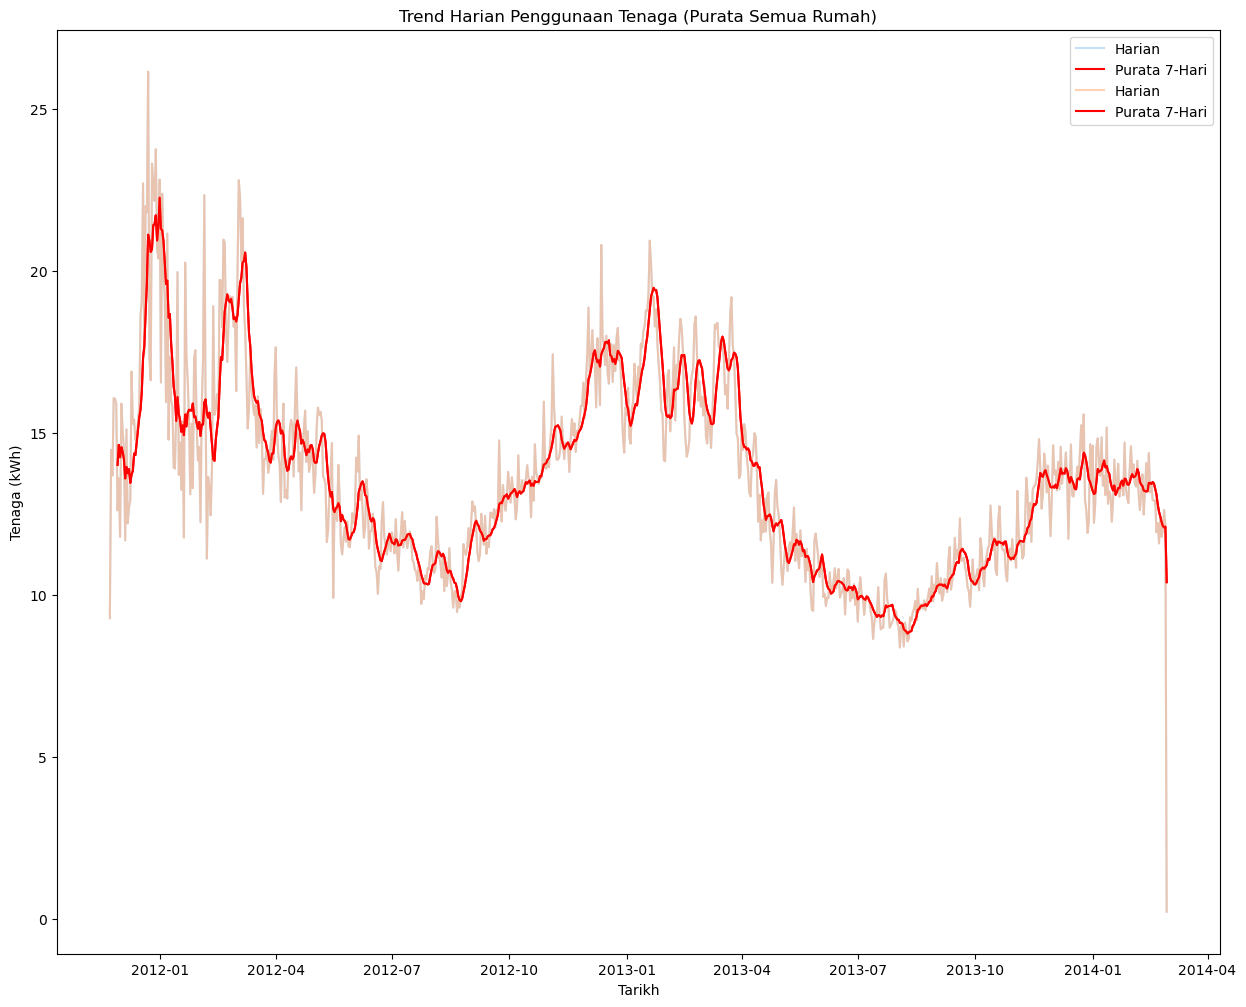

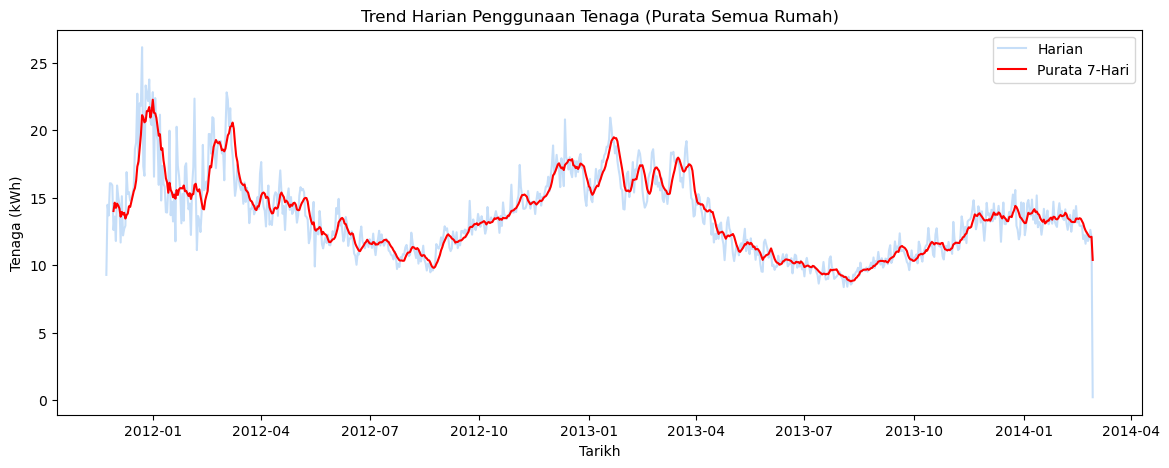

In [34]:
#1. Line Chart Trend Harian
plt.figure(figsize=(14, 5))
plt.plot(daily_avg.index, daily_avg, label='Harian', alpha=0.6)
plt.plot(daily_avg.index, daily_avg_7d, color='red', label='Purata 7-Hari')
plt.title("Trend Harian Penggunaan Tenaga (Purata Semua Rumah)")
plt.xlabel("Tarikh")
plt.ylabel("Tenaga (kWh)")
plt.legend()
plt.show()


The daily trend of electricity consumption shows noticeable fluctuations throughout the observed period (2012–2014). There are several clear peaks in energy usage, with the highest occurring around the beginning of 2012 and early 2013, which may correspond to colder winter months where heating demand is higher. The moving 7‑day average line smooths out these fluctuations and highlights overall seasonal patterns: higher usage during winter months and lower consumption during mid-year (summer). Towards early 2014, a sudden drop is observed.

The daily electricity consumption trend (average across all households) shows clear seasonal fluctuations between 2012 and early 2014. The blue line represents daily values, which are highly variable, while the red line (7-day moving average) smooths the data and highlights broader trends. Peaks in energy usage are most evident during the winter months (e.g., early 2012 and early 2013), likely reflecting increased heating demand. Conversely, lower consumption levels occur during mid-year (summer) periods. The sharp drop at the end of the graph (early 2014) likely corresponds to incomplete data rather than an actual decline in energy usage.

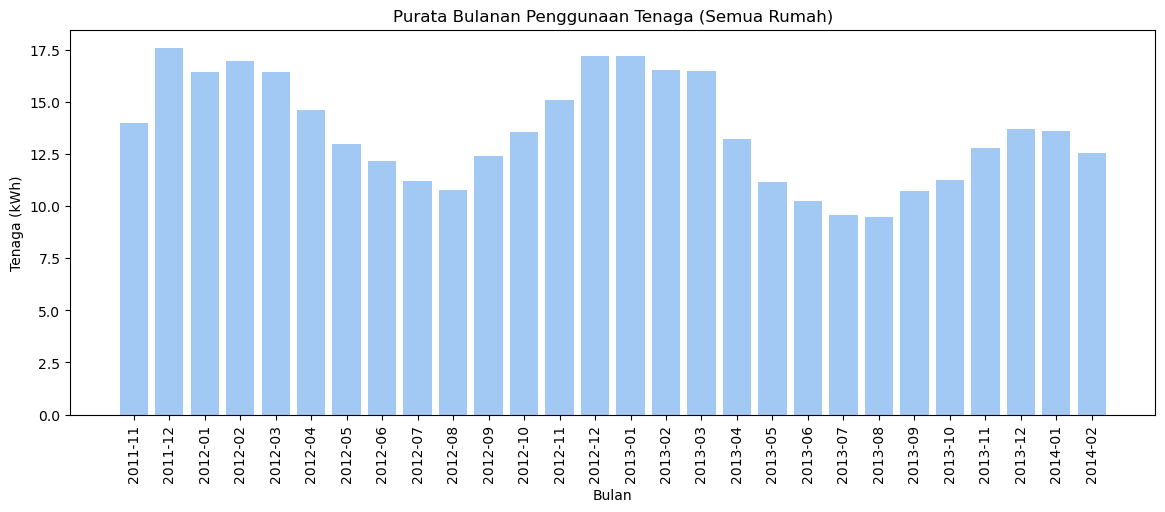

In [36]:
#2. Bar Chart Purata Bulanan
plt.figure(figsize=(14, 5))
plt.bar(monthly_avg.index.strftime('%Y-%m'), monthly_avg)
plt.title("Purata Bulanan Penggunaan Tenaga (Semua Rumah)")
plt.xlabel("Bulan")
plt.ylabel("Tenaga (kWh)")
plt.xticks(rotation=90)
plt.show()

The monthly average electricity consumption across all households shows a clear seasonal pattern. The highest average usage occurs during the winter months, particularly in December 2011, December 2012, and January 2013, where consumption reaches around 17–18 kWh. This trend likely reflects increased heating demand during colder periods. In contrast, the lowest usage is observed during the summer months (June to August 2012 and mid-2013), where averages drop to around 9–11 kWh. This cyclical pattern demonstrates that household electricity usage is strongly influenced by seasonal changes, with consistent peaks in winter and troughs in summer.

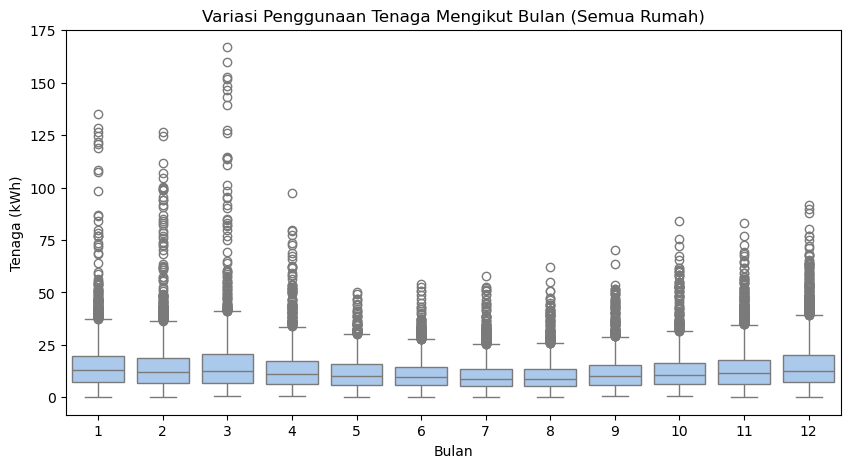

In [38]:
#3. Boxplot Variasi Bulanan
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='energy_sum', data=data)
plt.title("Variasi Penggunaan Tenaga Mengikut Bulan (Semua Rumah)")
plt.xlabel("Bulan")
plt.ylabel("Tenaga (kWh)")
plt.show()

The boxplot illustrates the monthly variation in daily electricity consumption across all households. Most months exhibit a relatively consistent median consumption level, ranging between 8–15 kWh. However, there are notable outliers, especially in March and January, where some households recorded exceptionally high daily usage exceeding 100 kWh. The interquartile range (IQR) is generally wider in the colder months (January–March and December), indicating greater variability in household energy usage during winter. Conversely, mid-year months (June–August) show narrower IQRs and fewer extreme values, reflecting more stable and lower consumption during the warmer season.

In [40]:
# 4. Insight Automatik: Bulan Tertinggi & Terendah
max_month = monthly_avg.idxmax().strftime('%B %Y')
max_value = monthly_avg.max()

min_month = monthly_avg.idxmin().strftime('%B %Y')
min_value = monthly_avg.min()

print(f"Bulan penggunaan tertinggi: {max_month} ({max_value:.2f} kWh)")
print(f"Bulan penggunaan terendah: {min_month} ({min_value:.2f} kWh)")

Bulan penggunaan tertinggi: December 2011 (17.59 kWh)
Bulan penggunaan terendah: August 2013 (9.47 kWh)


In [44]:
# 5. Banding Rumah Tertinggi vs Terendah
# Jumlah penggunaan setiap rumah
total_by_house = data.groupby('LCLid')['energy_sum'].sum()
total_by_house

LCLid
MAC000155    11556.667000
MAC000326    11707.438004
MAC000442     3954.574000
MAC000455    17700.965996
MAC000503     4511.758000
MAC000814     4490.911999
MAC001116    10402.505999
MAC001166     7547.292000
MAC001232     6697.188999
MAC001255     9114.463999
MAC001258    14366.943004
MAC001359     5549.106999
MAC001803      786.360000
MAC001897     4922.949001
MAC001956    13499.666997
MAC001964     4021.865000
MAC001980     2886.177000
MAC001999     3498.645000
MAC002109     4604.178000
MAC002138     7383.535000
MAC002741    17074.799000
MAC002751     9735.648000
MAC002779     2234.228000
MAC002805     9265.407000
MAC002812     5009.133000
MAC002820     8393.696999
MAC002885     4966.379001
MAC002891     3673.216000
MAC003958     7403.552001
MAC003987     9535.591002
MAC004006     6965.295000
MAC004007    11337.569002
MAC004026     6073.055000
MAC004051    10924.066000
MAC004070     5085.377000
MAC004075     9129.714000
MAC004111     6143.231000
MAC004242     3029.774000
MAC004

In [46]:
#6. Cari rumah tertinggi & terendah
highest_house = total_by_house.idxmax()
lowest_house = total_by_house.idxmin()

print(f"Rumah penggunaan tertinggi: {highest_house} ({total_by_house.max():.2f} kWh)")
print(f"Rumah penggunaan terendah: {lowest_house} ({total_by_house.min():.2f} kWh)")

Rumah penggunaan tertinggi: MAC005318 (30937.07 kWh)
Rumah penggunaan terendah: MAC001803 (786.36 kWh)


In [50]:
#7. Filter data dua rumah ini
highest_data = data[data['LCLid'] == highest_house]
lowest_data = data[data['LCLid'] == lowest_house]
highest_data
lowest_data

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,month,weekday
7988,MAC001803,2012-06-06,0.0180,0.019130,0.028,23,0.003415,0.440,0.014,6,Wednesday
7989,MAC001803,2012-06-07,0.0180,0.018208,0.023,48,0.002805,0.874,0.014,6,Thursday
7990,MAC001803,2012-06-08,0.0180,0.021250,0.134,48,0.017541,1.020,0.014,6,Friday
7991,MAC001803,2012-06-09,0.0190,0.070625,0.529,48,0.131427,3.390,0.014,6,Saturday
7992,MAC001803,2012-06-10,0.0200,0.024958,0.134,48,0.018040,1.198,0.015,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
8616,MAC001803,2014-02-24,0.0185,0.020604,0.062,48,0.019477,0.989,0.000,2,Monday
8617,MAC001803,2014-02-25,0.0175,0.020708,0.053,48,0.018623,0.994,0.000,2,Tuesday
8618,MAC001803,2014-02-26,0.0210,0.020271,0.059,48,0.018232,0.973,0.000,2,Wednesday
8619,MAC001803,2014-02-27,0.0150,0.020521,0.059,48,0.019737,0.985,0.000,2,Thursday


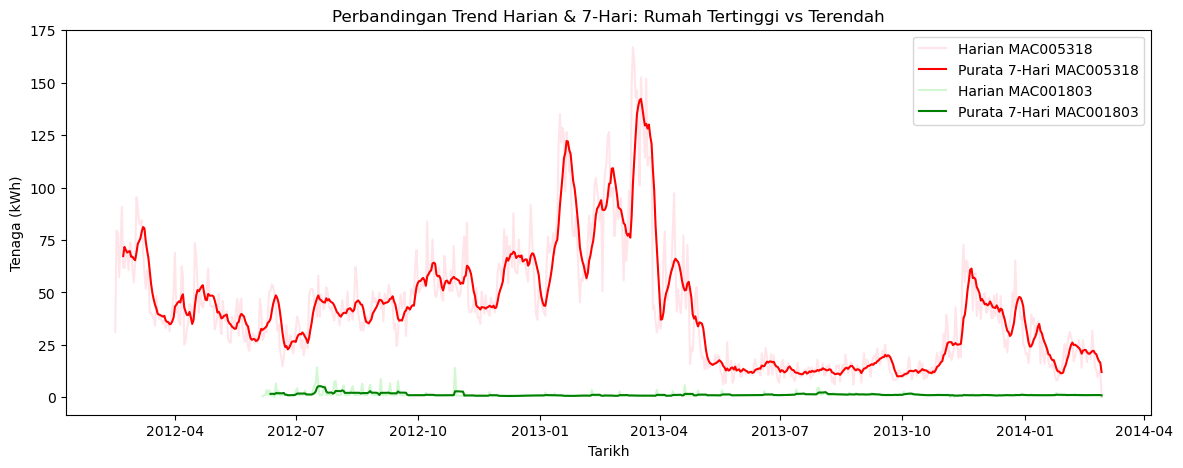

In [62]:
# 8. Moving average untuk rumah tertinggi & terendah
highest_data = highest_data.sort_index()
lowest_data = lowest_data.sort_index()

# Kira moving average 7 hari
highest_data['7d_avg'] = highest_data['energy_sum'].rolling(window=7).mean()
lowest_data['7d_avg'] = lowest_data['energy_sum'].rolling(window=7).mean()

# Plot perbandingan
plt.figure(figsize=(14,5))

# Rumah tertinggi (harian + moving average)
plt.plot(highest_data.index, highest_data['energy_sum'], color='pink', alpha=0.4, label=f"Harian {highest_house}")
plt.plot(highest_data.index, highest_data['7d_avg'], color='red', label=f"Purata 7-Hari {highest_house}")

# Rumah terendah (harian + moving average)
plt.plot(lowest_data.index, lowest_data['energy_sum'], color='lightgreen', alpha=0.4, label=f"Harian {lowest_house}")
plt.plot(lowest_data.index, lowest_data['7d_avg'], color='green', label=f"Purata 7-Hari {lowest_house}")

plt.title("Perbandingan Trend Harian & 7-Hari: Rumah Tertinggi vs Terendah")
plt.xlabel("Tarikh")
plt.ylabel("Tenaga (kWh)")
plt.legend()
plt.show()

The comparison between the highest and lowest energy-consuming households highlights a significant disparity in daily electricity usage. Household MAC005318 (red line) consistently records the highest consumption, frequently exceeding 50 kWh per day, with extreme peaks above 100 kWh during winter months (e.g., early 2013). In contrast, household MAC001803 (green line) shows consistently low daily usage, rarely surpassing 5 kWh. The 7‑day moving averages reveal that both households follow similar seasonal trends — higher consumption in winter and lower in summer — but at vastly different magnitudes. This suggests variations in household size, appliances, or energy behaviour contributing to the consumption gap.

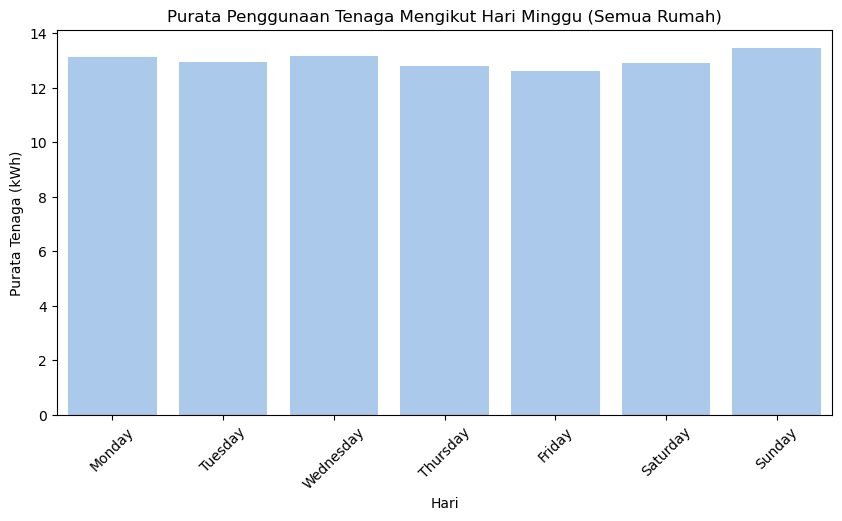

In [64]:
# 9. Corak Purata Mingguan Semua Rumah
# Purata penggunaan ikut hari minggu
weekly_pattern = data.groupby('weekday')['energy_sum'].mean()

# Susun ikut Isnin → Ahad
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pattern = weekly_pattern.reindex(order_days)

# Plot bar chart corak mingguan
plt.figure(figsize=(10,5))
sns.barplot(x=weekly_pattern.index, y=weekly_pattern.values)
plt.title("Purata Penggunaan Tenaga Mengikut Hari Minggu (Semua Rumah)")
plt.xlabel("Hari")
plt.ylabel("Purata Tenaga (kWh)")
plt.xticks(rotation=45)
plt.show()

The weekly pattern of electricity consumption shows only slight variations between days. Average daily usage fluctuates around 13–14 kWh, with Sunday recording the highest average consumption and Friday the lowest. The relatively small difference across weekdays suggests that household electricity usage remains fairly consistent throughout the week, with a slight increase during weekends, likely due to more time spent at home.



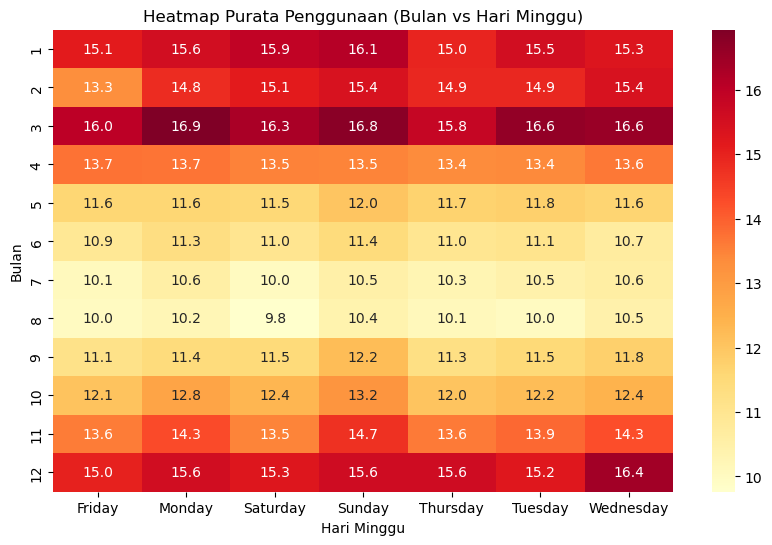

In [66]:
#10. Heatmap Corak Bulan vs Hari Minggu
pivot = data.pivot_table(values='energy_sum', index='month', columns='weekday', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Heatmap Purata Penggunaan (Bulan vs Hari Minggu)")
plt.xlabel("Hari Minggu")
plt.ylabel("Bulan")
plt.show()


The heatmap illustrates the interaction between monthly and weekly electricity consumption patterns. The highest averages are observed during the winter months (January and March), with Sunday and Monday typically showing slightly higher consumption compared to other weekdays. In contrast, the summer months (June to August) display lower energy usage across all days of the week, with values dropping below 11 kWh. This pattern confirms the strong influence of seasonal factors on energy demand, while day‑to‑day differences remain relatively minimal.

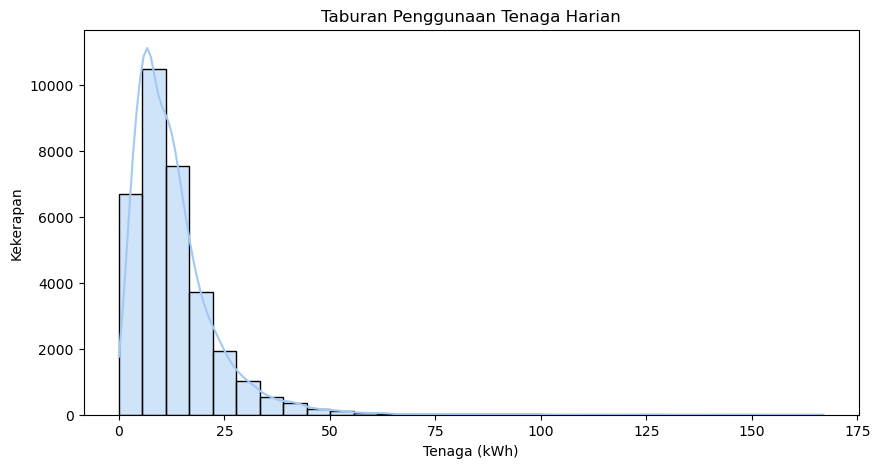

In [68]:
#11. Histogram / KDE (Taburan Penggunaan Harian)
plt.figure(figsize=(10,5))
sns.histplot(data['energy_sum'], bins=30, kde=True)
plt.title("Taburan Penggunaan Tenaga Harian")
plt.xlabel("Tenaga (kWh)")
plt.ylabel("Kekerapan")
plt.show()

The histogram shows the distribution of daily electricity consumption across all households. Most daily consumption values fall below 25 kWh, with the highest frequency occurring between 5–15 kWh. The distribution is right-skewed, indicating that while most households consume moderate amounts of energy daily, a small number of households exhibit extremely high consumption (outliers exceeding 100 kWh). This skewness suggests heterogeneity in household energy behaviour, possibly influenced by household size, appliance usage, or lifestyle patterns.

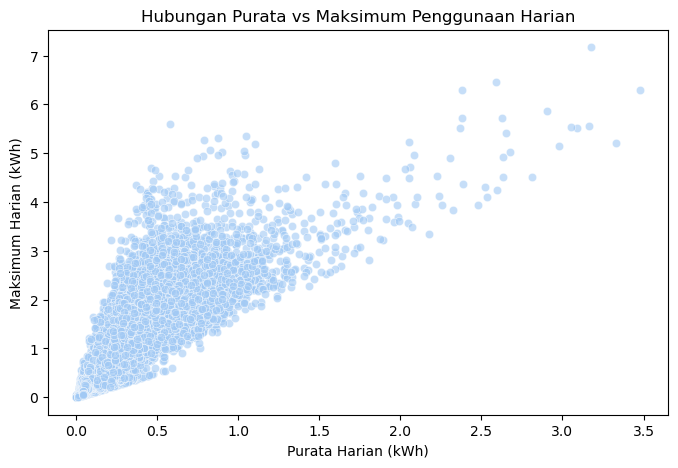

In [70]:
#12. Scatter Plot (Hubungan Purata vs Maksimum Harian)
plt.figure(figsize=(8,5))
sns.scatterplot(x='energy_mean', y='energy_max', data=data, alpha=0.6)
plt.title("Hubungan Purata vs Maksimum Penggunaan Harian")
plt.xlabel("Purata Harian (kWh)")
plt.ylabel("Maksimum Harian (kWh)")
plt.show()

The scatter plot shows the relationship between average daily consumption and maximum daily consumption across households. A positive correlation is observed: households with higher average daily usage also tend to have higher daily peak usage. Most data points are concentrated in the lower left quadrant (average below 1 kWh, maximum below 3 kWh), indicating that the majority of households have modest daily energy needs. However, several outliers are visible in the upper region, reflecting households with unusually high peak consumption relative to their daily averages, possibly due to occasional high-energy activities or appliances.

year        2011       2012       2013       2014
month                                            
1            NaN  16.451226  17.186080  13.593734
2            NaN  17.446510  16.532753  12.534804
3            NaN  16.272806  16.468139        NaN
4            NaN  14.586640  13.213259        NaN
5            NaN  12.713172  11.162368        NaN
6            NaN  12.091990  10.238669        NaN
7            NaN  11.185255   9.571706        NaN
8            NaN  10.776813   9.466319        NaN
9            NaN  12.395597  10.703426        NaN
10           NaN  13.557698  11.267934        NaN
11     13.965750  15.075363  12.774969        NaN
12     17.587806  17.191779  13.691750        NaN


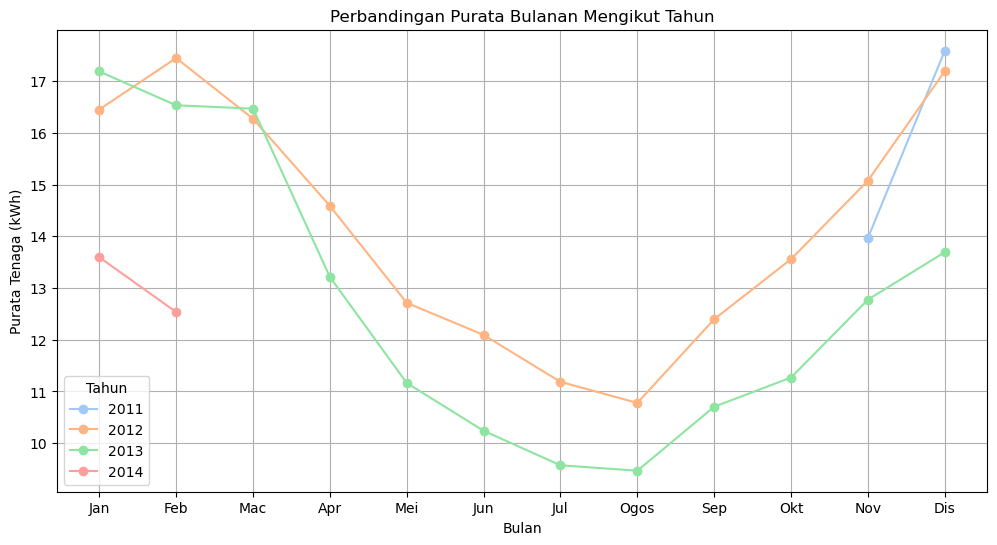

In [86]:
#13. Plot Perbandingan Tahun ke Tahun
# Pastikan index adalah datetime
data.index = pd.to_datetime(data.index, dayfirst=True)

# Tambah kolum tahun & bulan daripada index
data['year'] = data.index.year
data['month'] = data.index.month

# Kira purata bulanan setiap tahun
monthly_by_year = data.groupby(['year', 'month'])['energy_sum'].mean().unstack(level=0)

print(monthly_by_year)

plt.figure(figsize=(12,6))
for year in monthly_by_year.columns:
    plt.plot(monthly_by_year.index, monthly_by_year[year], marker='o', label=str(year))

plt.title("Perbandingan Purata Bulanan Mengikut Tahun")
plt.xlabel("Bulan")
plt.ylabel("Purata Tenaga (kWh)")
plt.xticks(range(1,13), ['Jan','Feb','Mac','Apr','Mei','Jun','Jul','Ogos','Sep','Okt','Nov','Dis'])
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

The line chart compares monthly average electricity consumption across different years (2011–2014). A consistent seasonal pattern is observed: usage peaks during the winter months (December to February) and declines steadily through spring and summer, reaching the lowest levels between June and August. While the overall trend is similar each year, there are slight variations in magnitude — for example, 2012 shows higher consumption throughout the year compared to 2013, while 2014 data is incomplete and only covers the early months. This recurring pattern highlights the significant influence of seasonal temperature changes on household energy demand.

<a name="Result and Discussion"></a>
# Result and Discussion

This section presents the analysis of daily electricity consumption data from multiple households in London, focusing on temporal trends and comparative insights. The results are structured by time scale (daily, weekly, monthly) and type of analysis (distribution, comparative patterns).

1. Daily Trends
Overall Daily Consumption
The daily electricity consumption trend (average across all households) exhibits clear seasonal fluctuations from 2012 to early 2014. Peaks in consumption are visible during winter months (e.g., early 2012 and early 2013), reflecting higher energy demand likely due to heating. In contrast, mid-year periods (summer) show lower usage levels. The 7-day moving average smooths daily volatility, highlighting consistent seasonal cycles. A sudden drop at the end of the graph (early 2014) is attributed to incomplete data rather than a real decline in usage.

2. Weekly Patterns
Average Consumption by Day of Week
Analysis of weekly patterns reveals minimal variation in daily energy usage across the week. Average consumption ranges between 13–14 kWh, with slightly higher usage on Sundays and slightly lower usage on Fridays. This suggests household energy demand remains relatively stable throughout the week, with modest increases during weekends, likely due to more occupants staying at home.

Monthly vs Weekly Interaction (Heatmap)
The heatmap illustrates combined seasonal and weekly effects. Winter months (January and March) display the highest daily averages across most weekdays, while summer months (June–August) record the lowest usage. Differences between weekdays are small, but weekends occasionally show marginally higher values. This confirms that seasonal factors dominate energy consumption patterns compared to weekly behaviours.

3. Monthly Trends
Average Monthly Consumption
Monthly averages highlight strong seasonality, with peaks in December and January (≈17–18 kWh) and troughs in June–August (≈9–11 kWh). This cycle repeats annually, underscoring the impact of colder temperatures on energy usage.

Year-to-Year Comparison
Comparing monthly patterns across 2011–2014 reveals consistent seasonal cycles but varying magnitudes. For example, 2012 records higher consumption than 2013, possibly due to colder winters or different household behaviours. Data from 2014 is incomplete but aligns with prior seasonal trends.

Monthly Variation (Boxplot)
Boxplots show wider interquartile ranges and more extreme outliers in winter months (January–March and December), indicating greater variability in household energy usage during colder periods. Summer months display narrower ranges and fewer outliers, suggesting more stable and lower consumption during warmer seasons.

4. Household Comparison
Highest vs Lowest Consumption
A comparison of the highest-consuming household (MAC005318) and the lowest-consuming household (MAC001803) demonstrates substantial differences in daily usage magnitude. MAC005318 frequently exceeds 50 kWh per day, peaking above 100 kWh in winter, while MAC001803 rarely surpasses 5 kWh. Despite this disparity, both households follow similar seasonal trends — higher in winter, lower in summer — suggesting common environmental drivers but different household characteristics (e.g., size, appliances).

5. Consumption Distribution and Correlation
Distribution of Daily Consumption
The histogram of daily energy usage reveals a right-skewed distribution: most households consume between 5–15 kWh per day, while a small proportion exhibit extremely high usage (outliers >100 kWh). This skewness indicates heterogeneity in energy behaviour, possibly influenced by lifestyle and household size.

Average vs Maximum Daily Consumption
The scatter plot shows a positive correlation between average daily consumption and maximum daily consumption. Households with higher daily averages tend to have higher peaks, though some outliers demonstrate occasional extreme peaks despite moderate averages, suggesting irregular high-energy activities.

Discussion Summary
Overall, the analysis highlights seasonality as the dominant factor influencing household electricity usage, with clear winter peaks and summer troughs observed consistently across multiple years. Weekly patterns are relatively minor, but weekends show slightly higher usage. Significant disparities exist between households, reflecting differences in household size, behaviour, and appliance usage. These insights can inform energy demand forecasting and targeted efficiency measures, particularly during peak winter months.



<a name="conclusion"></a>
# Conclusion

This project analysed daily electricity consumption data from London households, focusing on temporal patterns and comparative behaviours. The findings reveal a consistent seasonal cycle, with energy usage peaking during winter months (December to February) and dropping during summer (June to August). Weekly variations are minimal, though weekends show slightly higher consumption.

Comparison between households highlights significant disparities in overall usage, suggesting differences in household size, appliance ownership, and behavioural habits. Distribution analysis shows most households consume moderate amounts of energy daily, while a minority exhibit extreme peaks, indicating diverse energy behaviours.

These insights underscore the importance of incorporating seasonality and household-level variability into energy forecasting and demand management strategies. Understanding when and how energy demand fluctuates can assist utility providers and policymakers in implementing targeted efficiency programs, reducing peak load stress, and encouraging sustainable energy consumption among households.


<a name="references"></a>
# References

1. UK Power Networks. (2015). Low Carbon London project: SmartMeter energy consumption data in London households. London DataStore. https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households
2. Deveaux, J-M. (2020). Smart Meters in London. Kaggle. https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london
3. Jenkins, D., & Torriti, J. (2012). Household electricity demand: Review of models for demand reduction. UK Energy Research Centre. https://doi.org/10.13140/RG.2.1.4821.5528
4. Department of Energy & Climate Change. (2014). Smart metering implementation programme. UK Government. https://www.gov.uk/government/collections/smart-metering-implementation-programme
5. McKenna, E., Richardson, I., & Thomson, M. (2012). Smart meter data: Balancing consumer privacy concerns with legitimate applications. Energy Policy, 41, 807–814.https://doi.org/10.1016/j.enpol.2011.11.049
6. Beckel, C., Sadamori, L., & Santini, S. (2014). Automatic socio-economic classification of households using electricity consumption data. Proceedings of the 5th International Conference on Future Energy Systems (ACM e-Energy), 75–86.https://doi.org/10.1145/2602044.2602051

<a name="FnE"></a>
# Further Endeavours

Incorporate Seasonal Forecasting
Energy providers should integrate seasonal trends into demand forecasting models to anticipate higher loads during winter months and plan energy supply accordingly.

Target High-Consumption Households
Households with consistently high usage could be targeted for energy efficiency audits and offered incentives to adopt energy-saving appliances or behavioural adjustments.

Promote Weekend Efficiency Measures
As weekends show slightly higher energy usage, awareness campaigns or dynamic pricing strategies could encourage households to manage peak weekend consumption.

Expand Data Coverage and Features
Future studies could benefit from additional data, such as household demographics, appliance details, and weather data, to better understand factors driving consumption variability.

Policy and Infrastructure Planning
Policymakers can use these insights to design more effective energy policies, improve grid stability during high-demand periods, and support sustainability goals.